Apply contrast stretching, histogram equalization, blurring, Sharpening, and edge detection. 

(include input and output image with code and brief explanation)



In [1]:
from PIL import Image, ImageFilter
import numpy as np 
import cv2
from matplotlib import pyplot as plt

## Contrast Stretching

In [2]:
minI_def = 140
maxI_def = 240

In [3]:
img_name = 'test12.png'
img_cs_name = 'test12_cs.png' #contrast stretching
img_he_g_name = 'test12_he_g.png' #histogram equalization (gray)
img_he_rgb_name = 'test12_he_rgb.png' #histogram equalization (rgb)
img_blr_name = 'test12_blr.png' #blurring
img_shrp_name = 'test12_shrp.png' #sharpening
img_ed_name = 'test12_ed.png' #edge detection

In [4]:
# Method to process the color band of the image
def normalize(intensity):
    iI = intensity  

    minI = minI_def
    maxI = maxI_def
    minO = 0
    maxO = 255 
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO 

In [5]:
# Create an image object
image = Image.open(img_name)

# Split the red, green and blue bands from the Image
multiBands = image.split()

# Apply point operations that does contrast stretching on each color band
normalizedRedBand = multiBands[0].point(normalize)
normalizedGreenBand = multiBands[1].point(normalize)
normalizedBlueBand = multiBands[2].point(normalize)

# Create a new image from the contrast stretched red, green and blue brands
image_normalized = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

# Save the image after contrast stretching
image_normalized.save(img_cs_name)

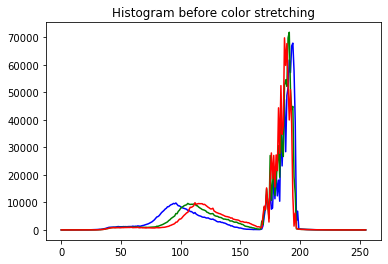

In [6]:
img = cv2.imread(img_name, -1)

color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
plt.title('Histogram before color stretching')
plt.show()

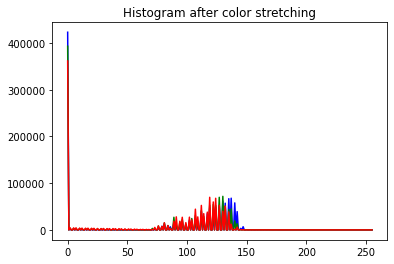

In [7]:
img = cv2.imread(img_cs_name, -1)

color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
plt.title('Histogram after color stretching')
plt.show()

## Histogram Equalization

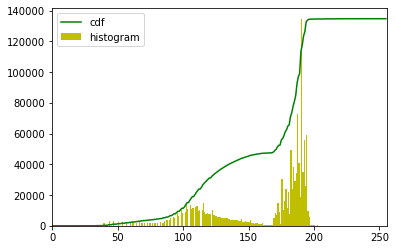

In [8]:
image = cv2.imread(img_name,0)
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(image.flatten(),256,[0,256], color = 'y')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [9]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
image2 = cdf[image]
cv2.imwrite(img_he_g_name, image2)

True

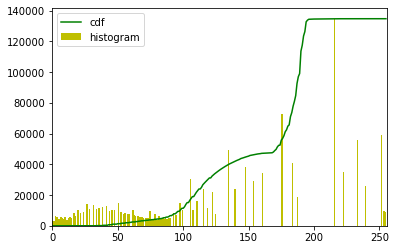

In [10]:
plt.plot(cdf_normalized, color = 'g')
plt.hist(image2.flatten(),256,[0,256], color = 'y')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [11]:
rgb_img = cv2.imread(img_name)

    # convert from RGB color-space to YCrCb
ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)

    # equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

    # convert back to RGB color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(img_he_rgb_name, equalized_img)

True

## Blurring

In [12]:
kernel_size = 100

# Reading the image
image = cv2.imread(img_name)
 
# Creating the kernel with numpy
kernel = np.ones((kernel_size, kernel_size), np.float32)/(kernel_size ** 2)
 
# Applying the filter
image_blr = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Save image
cv2.imwrite(img_blr_name, image_blr)

True

## Sharpening

In [13]:
# Reading the image
image = cv2.imread(img_name)

# Creating the kernel with numpy
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Applying the filter
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Save image
cv2.imwrite(img_shrp_name, image_sharp)

True

## Edge Detection

In [14]:
image = Image.open(img_name)
  
# Converting the image to grayscale
image = image.convert("L")
  
# Detecting Edges on the Image
image = image.filter(ImageFilter.FIND_EDGES)
  
# Saving the Image with detected edges
image.save(img_ed_name)